In [726]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [727]:
df = pd.read_csv("bike_sharing.csv")

**Background** : 

Yulu has recently suffered considerable dips in its revenues. 
They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. 
Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

- **Primary Goal** 
 - Recognizing **significant features** that will drive demand for shared electric cycles in the Indian market.
 - How well those features describe the demand
 - Recognizing **Demand pattern** based on  **season , weather condition , workingday , usage frequency** etc.
 - Indentifying **customer segments,profiling and formulating markerting strategy**
 - How to **drive sales of products and revenue** , across product categories
       - Data driven discounting / offers among customer segments
         
- **Statistical summary**
 - More **likelihood of purchase**
 - Range / Limitation of data  

- **Long term benefits** : Sales growth , Customer acquisition  and retention

### Basic Analysis

- **Analysing metrics** - Basic metrics
 - Observations on **shape** of data
 - **Data types** of all the attributes
 - **Conversion** of categorical attributes to 'category' (If required)
 - **Structure & characteristics** of the dataset
 - Statistical summary

##### Structure & characteristics of the dataset

In [728]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


##### Observations on shape of data

In [729]:
df.shape

(10886, 12)

- **Conclusion** - Not a small size sample 

##### Statistical summary

In [730]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [731]:
df.describe(include=object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


##### Not converting of categorical attributes to 'category' for the interest of statistical hypothesis test.  

### Converting datetime into month days and year

In [732]:
df["datetime"]= pd.to_datetime(df["datetime"])
df["rented_year"] = df["datetime"].dt.year
df["rented_month"] = df["datetime"].dt.month_name()
df["rented_weekday"] = df["datetime"].dt.weekday

### Non-Graphical Analysis

In [733]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rented_year,rented_month,rented_weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,5


In [734]:
df["weather"].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

- **Observation** 
 - Very less sample of weather 4 (i.e. 0.009%), so we can get rid of that category
 - Unbalanced weather categories / groups

In [735]:
df["season"].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

- **Observation** 
 - Balanced season categories / groups

In [859]:
df["holiday"].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

- **Observation** 
 - Un-Balanced holiday samples 

- **Feature types by data type** 

In [736]:
continious_features = df.select_dtypes(include=['int64','float64']).columns
continious_features

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'rented_year',
       'rented_weekday'],
      dtype='object')

### Missing Value Detection

- **Missing value detection** 

In [737]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
datetime,datetime,0.0
season,season,0.0
holiday,holiday,0.0
workingday,workingday,0.0
weather,weather,0.0
temp,temp,0.0
atemp,atemp,0.0
humidity,humidity,0.0
windspeed,windspeed,0.0
casual,casual,0.0


- **Insights** : 
 - Zero missing values , good quality data
 - No missing value treatments required 

### Outlier Detection &  Treatment Consideration

In [738]:
def find_outliers_IQR(column_name,df_group):
    print("Outliers by feature name --> ",column_name)
    Q1=df_group[column_name].quantile(0.25)
    Q3=df_group[column_name].quantile(0.75)

    IQR=Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df_group[((df_group[column_name]<lower) | (df_group[column_name]>upper))]

    return outliers

In [739]:
find_outliers_IQR("count",df)

Outliers by feature name -->  count


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rented_year,rented_month,rented_weekday
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,2012,March,0
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,2012,March,1
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,2012,March,1
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,2012,March,2
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,March,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,2012,December,1
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,2012,December,2
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,2012,December,3
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,December,1


- **Conclusion** 
 - **Outliers impacts mean based statistical methods**
 - **Observation during outlier removal** 
  - However, post outlier removal on dependent feature "count" , **still there are outliers exists in independent feature level e.g. different weather groups and season groups**
  - **Removing** those **outliers iteratively , can result loss of significant feature**
  - **Need domain expert consultation** before removing indepndent feature based outliers
  - Hence **proceeding with Baseline analysis with outliers**
  - Moreover, certain deep learning model can work without outliers , hence skipping outlier removal

In [740]:
df.shape

(10886, 15)

### Visual Analysis 

<AxesSubplot:xlabel='count', ylabel='Density'>

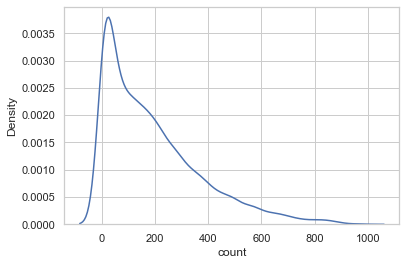

In [741]:
sns.kdeplot(data=df, x="count")

<AxesSubplot:xlabel='temp', ylabel='casual'>

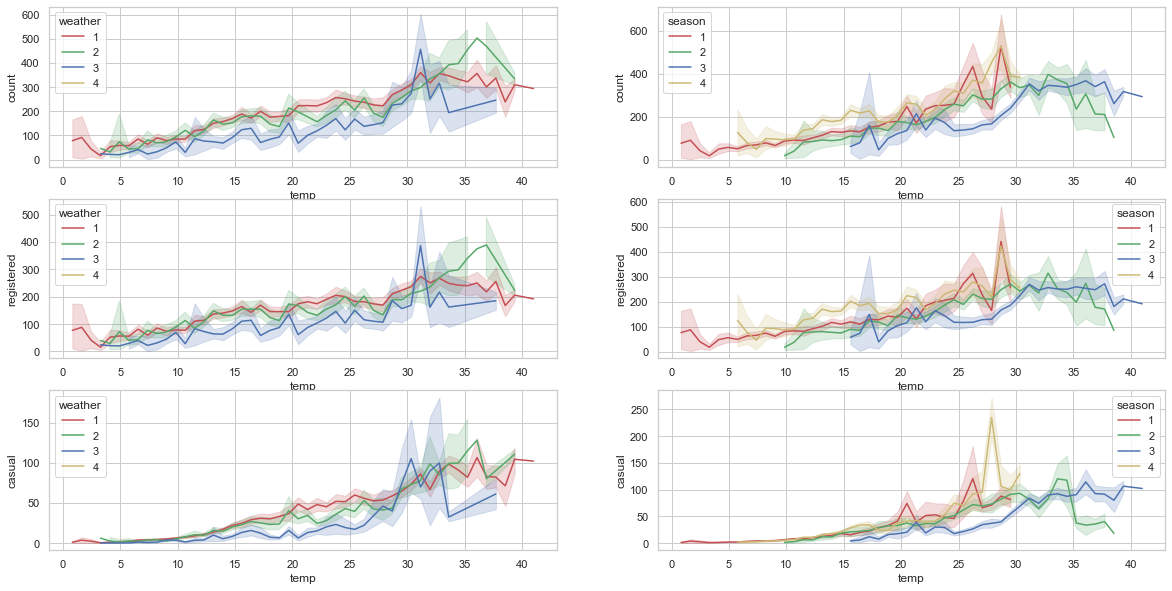

In [818]:
#Temperature , count wrt. weather and season
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
sns.lineplot(ax=axes[0,0], data=df, x="temp", y="count",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[0,1], data=df, x="temp", y="count",hue="season",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[1,0], data=df, x="temp", y="registered",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[1,1], data=df, x="temp", y="registered",hue="season",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[2,0], data=df, x="temp", y="casual",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[2,1], data=df, x="temp", y="casual",hue="season",palette=['r', 'g', 'b', 'y'])

- **Insights** based on **temperature , weather and user categories** (i.e. Registered vs Casual user)
  - **Weather(2 in green)** - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - **Pleasant temperature (between  25 and 35)** the **average volume of rents** were **high**
    - **Trends is consistent for both registered and Casual users**
  - **Weather(3 in blue)** - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - **Registered user** - **High volume** rents when temperature **between 31 to ~ 33**
    - **Casual user** - **High volume rents** when temperature **between ~28 to ~ 31** 
  - On **high temperature (beyond 36/37** **average volume of rents** starts reducing 
  - **Spring season (i.e. 1 in red) with temp between 25 to ~29** degree **high volumes were observed**
    - This is **significantly contributed by registered users**
  - **Fall season (i.e. 3 in blue) with temp between ~27 to ~37** degree **moderate volumes were observed**
    - This is **contributed by both registered and casual users**

<AxesSubplot:xlabel='humidity', ylabel='casual'>

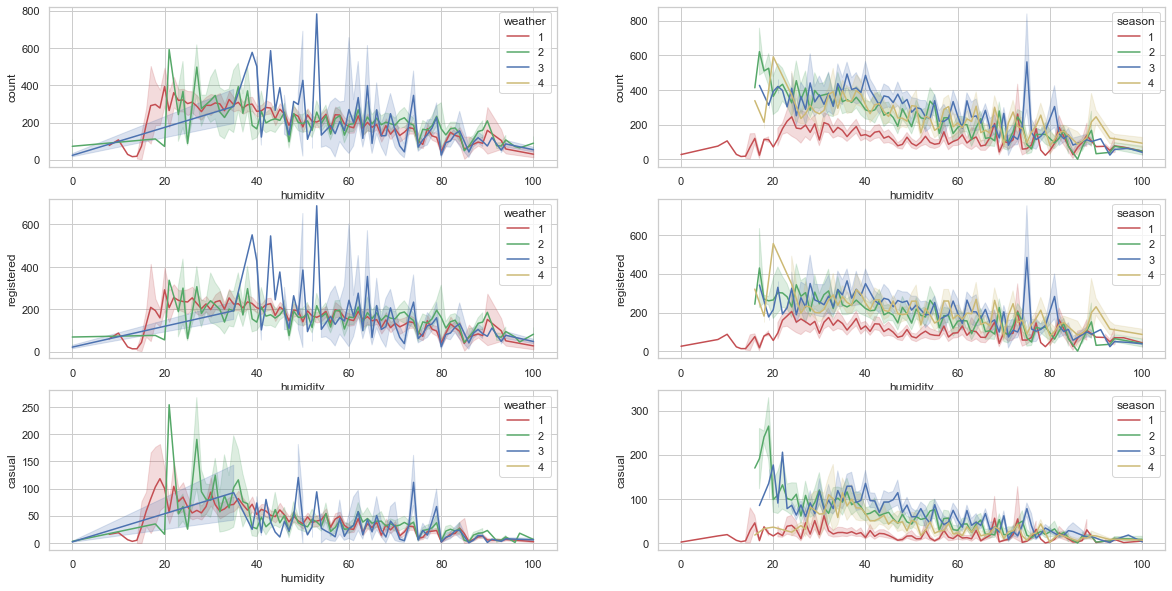

In [821]:
# Humidity , count wrt. weather and season
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
sns.lineplot(ax=axes[0,0], data=df, x="humidity", y="count",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[0,1], data=df, x="humidity", y="count",hue="season",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[1,0], data=df, x="humidity", y="registered",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[1,1], data=df, x="humidity", y="registered",hue="season",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[2,0], data=df, x="humidity", y="casual",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[2,1], data=df, x="humidity", y="casual",hue="season",palette=['r', 'g', 'b', 'y'])

- **Insights based on humidity**
  - **Humidity (close to 60 or more )** largely effects **average volume of rents**
   - However during **fall** around **humidity around 75-78** high volume rents were observed 
  - **At Low humidity**, **more aggresive marketing campaign** should be targetted 
  - **Others seasons except Spring , with humidity within 40** should be targeted for more marketing campaign
  - Casual users rents - Targeted marketing should be done
   - more in season 2(i.e.summer) in green  and season 3(i.e. fall) in blue
   - less in season 1(i.e. spring) in red

<AxesSubplot:xlabel='windspeed', ylabel='casual'>

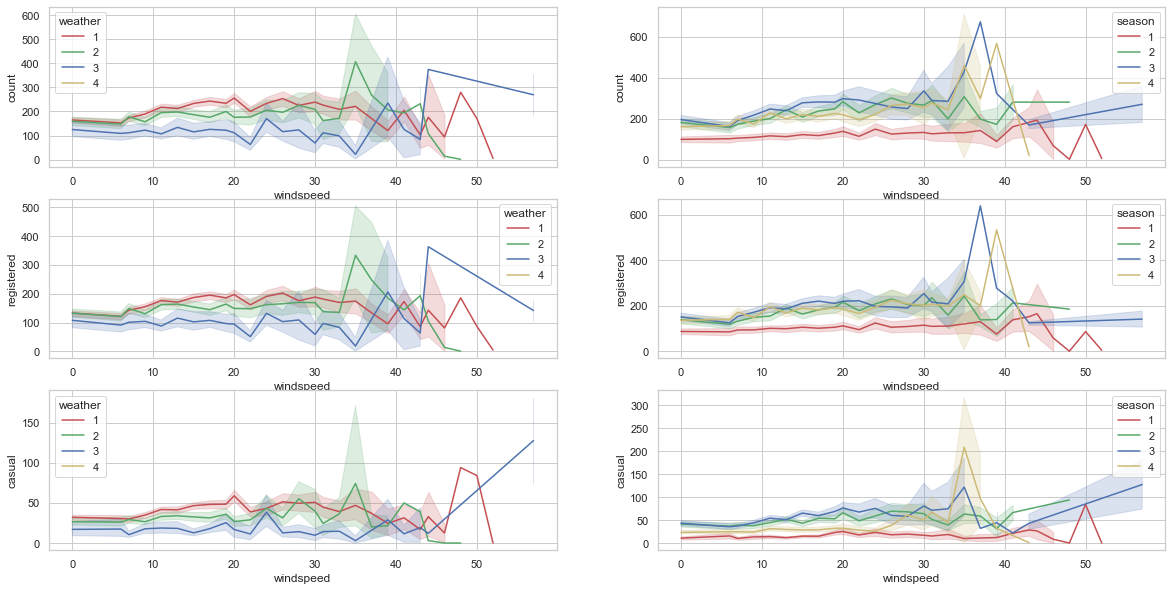

In [822]:
# Windspeed , count wrt. weather and season
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
sns.lineplot(ax=axes[0,0], data=df, x="windspeed", y="count",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[0,1], data=df, x="windspeed", y="count",hue="season",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[1,0], data=df, x="windspeed", y="registered",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[1,1], data=df, x="windspeed", y="registered",hue="season",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[2,0], data=df, x="windspeed", y="casual",hue="weather",palette=['r', 'g', 'b', 'y'])
sns.lineplot(ax=axes[2,1], data=df, x="windspeed", y="casual",hue="season",palette=['r', 'g', 'b', 'y'])

- **Insights based on windspeed**
 - **Windspeed between ~33 to 40** high volume rents were observed
   - **Majorly contributed by registered users**
   - **Specially for weather = 2 (in green) i.e. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**
   - **Specially in season fall** (i.e. 3 in blue) and **winter**(i.e. 4 in yellow)
   - **Registered users** rents **more in both fall and winter season**
   - **Casual users** rents **more in winter season**
 - **Windspeed beyond 46 or more**, volumes are very low. Hence some attractive deals should be released for specific customer profiles

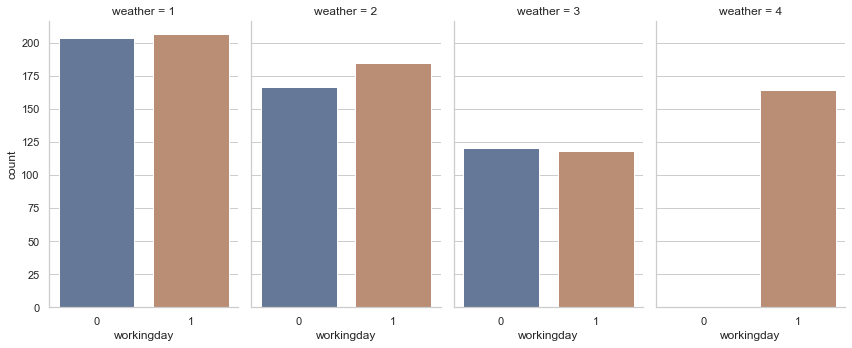

In [860]:
sns.catplot(x="workingday", y="count", col="weather",data=df, saturation=.5,kind="bar", ci=None, aspect=.6)

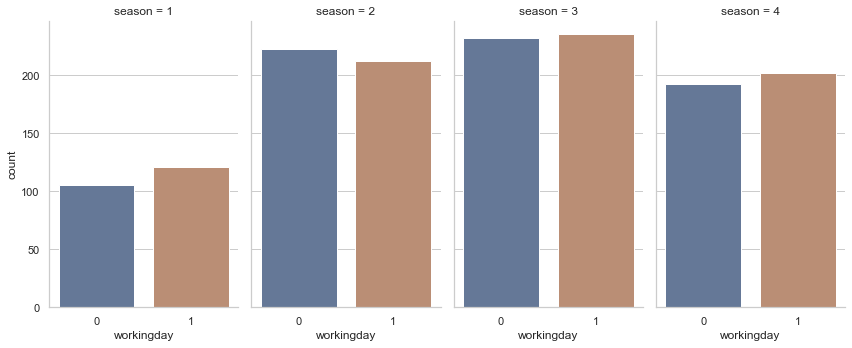

In [861]:
sns.catplot(x="workingday", y="count", col="season",data=df, saturation=.5,kind="bar", ci=None, aspect=.6)

- **Insights on other factors**
 - **More cycles rented when weather is either "Clear, Few clouds, partly cloudy, partly cloudy" or "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"**
 - **More cycles rented when season is either "Summer" or "Fall"**
 - **Month, year and weekday doesn't have much impact** on cycles being rented

### Rental Analysis

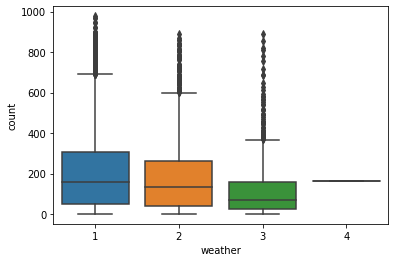

In [628]:
sns.boxplot(x = "weather", y="count", data=df)
plt.show()

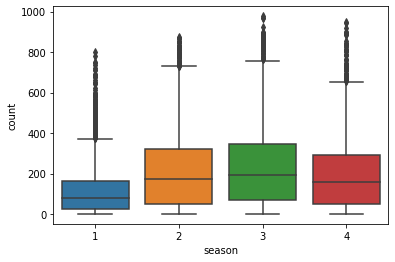

In [629]:
sns.boxplot(x = "season", y="count", data=df)
plt.show()

- **Observation** Outliers still exist post removal of outliers on overall samples 
 - **High outliers**
    - **season = 1** samples 
    - **weather = 3** samples
 - **Season 2 and 3 doesn't have outliers** 
 - **Season 4** has outliers too
 - **weather 2** has outliers too

### Split season and weather data into groups

In [630]:
df_weather_1 = df[df["weather"] == 1]
df_weather_2 = df[df["weather"] == 2]
df_weather_3 = df[df["weather"] == 3]

In [631]:
df_season_1 = df[df["season"] == 1]
df_season_2 = df[df["season"] == 2]
df_season_3 = df[df["season"] == 3]
df_season_4 = df[df["season"] == 4]

- **Heatmap**

- **Person correlation**
 - Pearson's correlation coefficient, r, is very sensitive to outliers
 - It can have a very large effect on the line of best fit and the Pearson correlation coefficient. 
 - This means — including outliers in your analysis can lead to misleading results.

<AxesSubplot:>

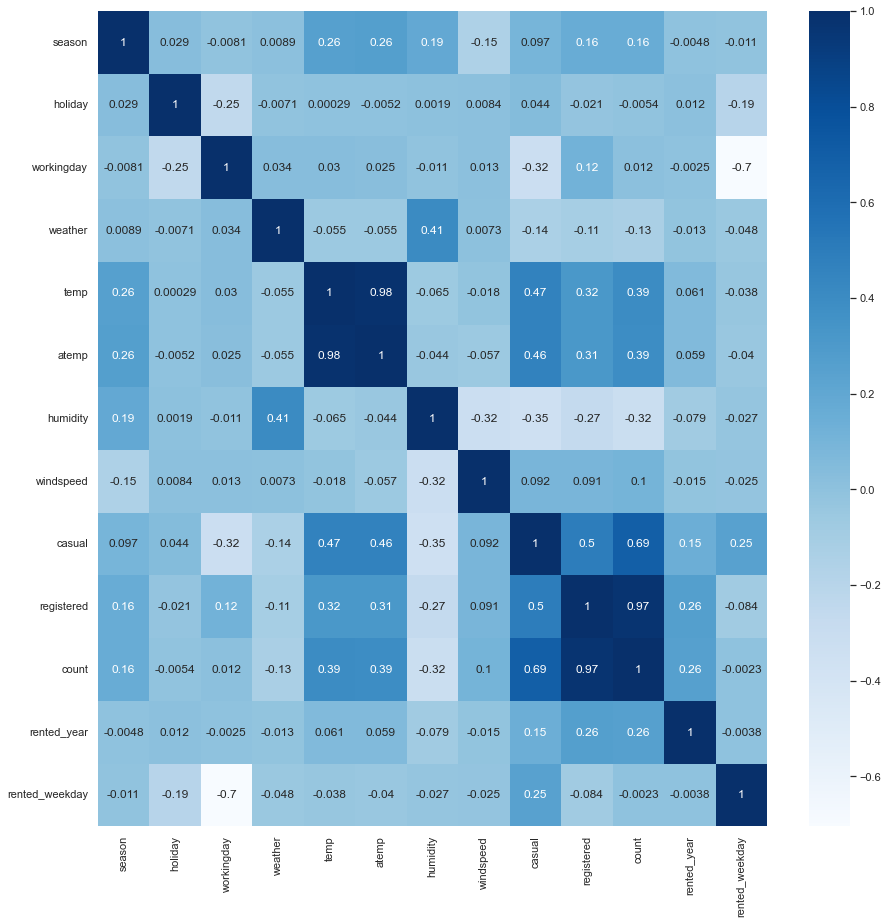

In [828]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(method='pearson'), cmap="Blues", annot=True)

- **Spearman correlation** - Better measure as there are multiple outliers in each groups

<AxesSubplot:>

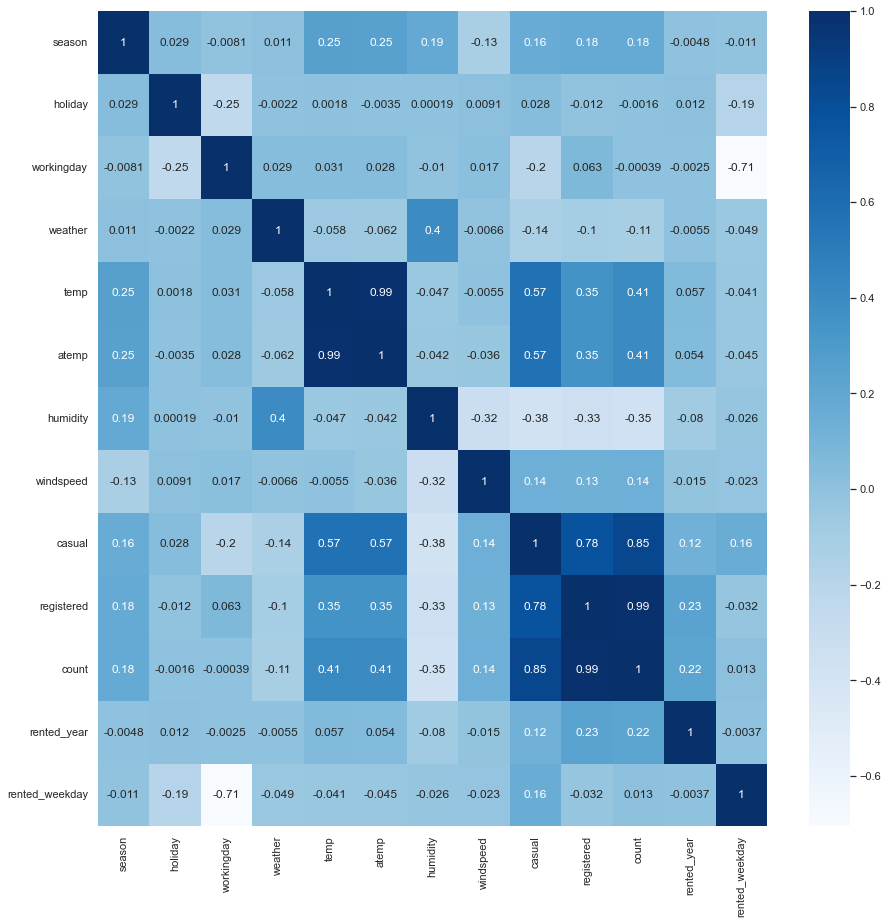

In [832]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(method='spearman'), cmap="Blues", annot=True)

- **Insights** : 
    - High correlation between following variables
        - temp and atemp
        - registered and count
        - casual and count
    - Slight correlation between following variables 
        - humidity and weather
        - casual and temp
        - temp and register
        - atemp and register
        - temp/atemp and season

### Hypothesis Testing

#### Sample T-Test

- **Sample T-Test** to check if Working Day has an effect on the number of electric cycles rented
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : **Group means** of Number of electric cycles, and Working days are **equal**
      - **Alternate hypothesis (Ha)** : **Group means** of Number of electric cycles, and Working days** are **NOT equal**

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Two sample T-test (Independent)** . 
          - Note : Could have used z-test as well because sample size is more than 30. However , T-test will be turnout to Z-Test as sample size is large (i.e. more than 10k)
      - Independent T-Test : Two diffrent random variable (i.e. count and workingday)  being tested 
  - **Decide One sided / two-sided tail test**
      - Two-sided as in Ha the measure is "not equal", we're neither checking greater nor lesser
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [633]:
stats.ttest_ind(df["count"],df["workingday"])

Ttest_indResult(statistic=109.95076974934595, pvalue=0.0)

 - **T-Test Analysis**
   - **Conclusion**
      - Failed to accept Null hupothesis as p value is 0 i.e. less than alpha value .05
      - **Can't reject that working day has no effect on number of electric cycles rented**

#### ANOVA

- **ANOVA Assumptions** : Folllowing assumptions must be verified before applying ANNOVA 
  - 1 - Each group's observations are Gaussian  (Can be verified using **distplot**)
  - 2 - Each group's variance is roughly the same (Can be verified using **histplot** and **levene's test**)
  - 3 - Each observation is independent (can be verified **using Chi-square test**)

### (STEP 1) Verify ANOVA Assumption # 1   -  Group's observations are Gaussian or not 

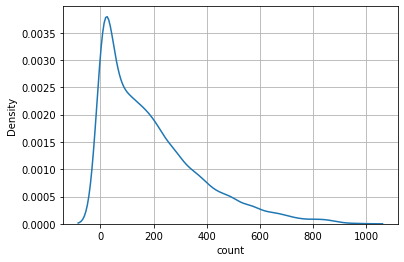

In [634]:
sns.distplot(df["count"], hist=False)
plt.grid()

- **Observation (on count)** : 
    - **Doesn't follow Gaussian**
    - **Conclusion** : **Can't apply ANOVA directly** , need to **apply transform** or **split the data into independent group** before using ANOVA

### (STEP 1.1) Split the data to seperate groups

- **Weather** - Analysis of weather by splitiing it into independent sub groups - weather 1 , 2, 3 (Ignoring 4 as there only 1 sample)

In [635]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

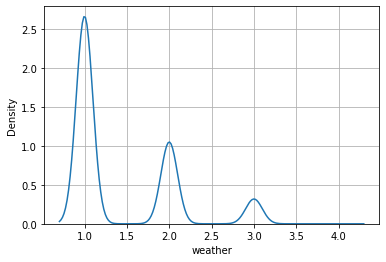

In [636]:
sns.distplot(df["weather"], hist=False)
plt.grid()

- **Observation (on Weather)** :
    - Weather is a **discreate random variable** , this distribution won't be useful , **need to focus on "count" distribution** of each weather groups , instead of overall weather sample
    - It **also follows multi modal distribution(will not follow Gaussian ever as Gaussian is applicable for continious random variable )**
    - Multi modal often means that data has a combination of many different subsets of observations
    - **Next approach** - **Split the data to seperate groups** and see that follows Gaussian and then apply ANOVA if it follows Gaussian 

In [637]:
df_weather_1 = df[df["weather"] == 1]
df_weather_2 = df[df["weather"] == 2]
df_weather_3 = df[df["weather"] == 3]

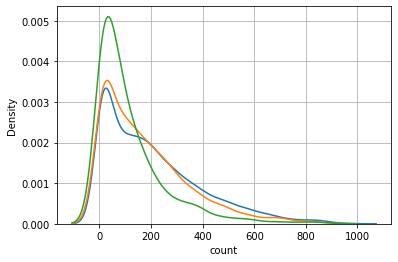

In [638]:
sns.distplot(df_weather_1["count"], hist=False)
sns.distplot(df_weather_2["count"], hist=False)
sns.distplot(df_weather_3["count"], hist=False)

plt.grid()

- **Further Observation (on Weather)** : 
    - **Doesn't follow Gaussian even with individual weather groups** 
    - **Conclusion** : **Can't apply ANOVA directly** , need to **apply transform** before using ANOVA 

- **Season** - Analysis of weather by splitiing it into independent sub groups - 1 , 2, 3, 4

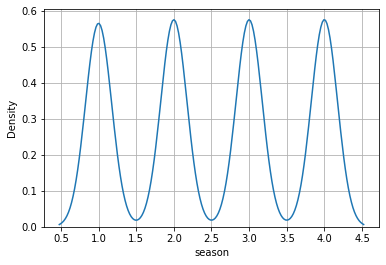

In [639]:
sns.distplot(df["season"], hist=False)
plt.grid()

- **Observation (on Season)** :
    - Season is a discreate random variable , this distribution won't be useful , **need to focus on "count" distribution** of each season groups , instead of overall season sample
    - It **also follows multi modal distribution(will not follow Gaussian ever as Gaussian is applicable for continious random variable )**
    - Multi modal often means that data has a combination of many different subsets of observations
    - **Next approach** - **Split the data to seperate groups** and see that follows Gaussian and then apply ANOVA if it follows Gaussian 

In [640]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [641]:
df_season_1 = df[df["season"] == 1]
df_season_2 = df[df["season"] == 2]
df_season_3 = df[df["season"] == 3]

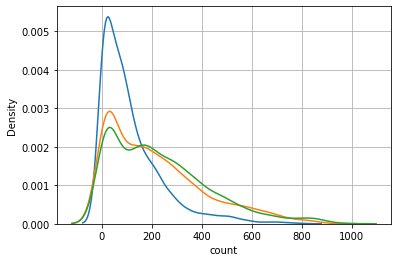

In [642]:
sns.distplot(df_season_1["count"], hist=False)
sns.distplot(df_season_2["count"], hist=False)
sns.distplot(df_season_3["count"], hist=False)

plt.grid()

- **Further Observation (on Season)** : 
    - **Doesn't follow Gaussian even with individual season groups** 
    - **season 3** has **bimodal distribution it seems** 
    - **Conclusion** : **Can't apply ANNOVA directly** , need to **apply transform** before using ANOVA 

### (STEP 1.2) Transform distribution to covert to Gaussian 

 - **Box-Cox Transformation** (combined groups)

In [643]:
fitted_data, fitted_lambda = stats.boxcox(df["count"])

<AxesSubplot:ylabel='Density'>

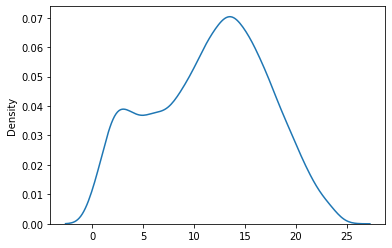

In [644]:
sns.distplot(fitted_data, hist=False)

- QQplot normality check

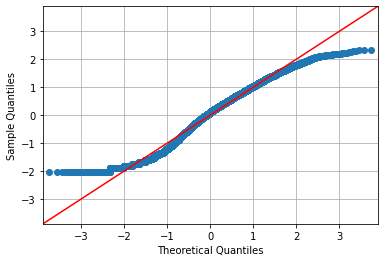

In [645]:
fig = sm.qqplot(fitted_data, line='45', fit=True)
plt.grid()

In [646]:
df_weather1_selected = df_weather_1[["weather","count"]]
df_weather2_selected = df_weather_2[["weather","count"]]
df_weather3_selected = df_weather_3[["weather","count"]]

df_season1_selected = df_season_1[["season","count"]]
df_season2_selected = df_season_2[["season","count"]]
df_season3_selected = df_season_3[["season","count"]]

 - **Box-Cox Transformation** (Individual groups)

In [647]:
# transform data & save lambda value
df_weather1_boxcox_transformed, df_weather1_boxcox_fitted_lambda = stats.boxcox(df_weather1_selected["count"])
df_weather2_boxcox_transformed, df_weather2_boxcox_fitted_lambda = stats.boxcox(df_weather2_selected["count"])
df_weather3_boxcox_transformed, df_weather3_boxcox_fitted_lambda = stats.boxcox(df_weather3_selected["count"])
df_season1_boxcox_transformed, df_season1_boxcox_fitted_lambda = stats.boxcox(df_season1_selected["count"])
df_season2_boxcox_transformed, df_season2_boxcox_fitted_lambda = stats.boxcox(df_season2_selected["count"])
df_season3_boxcox_transformed, df_season3_boxcox_fitted_lambda = stats.boxcox(df_season3_selected["count"])

 - **Weather 1** - **Before and After Boxcox** transformation

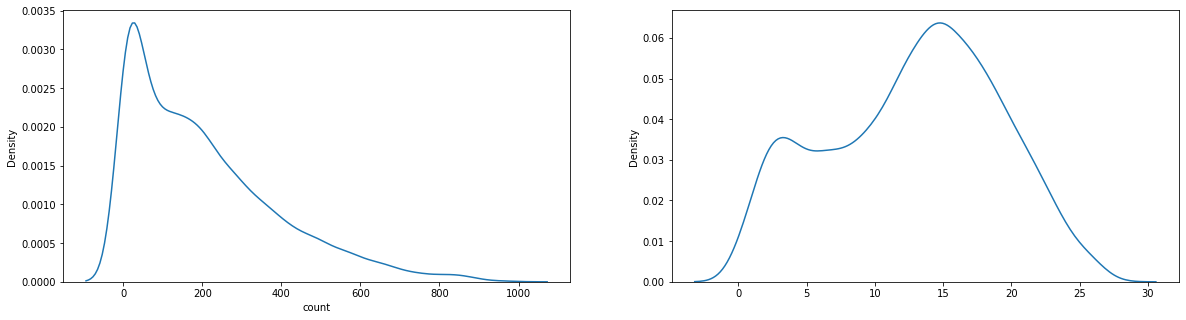

<Figure size 1080x360 with 0 Axes>

In [648]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_weather1_selected["count"], hist=False,ax = ax[0])
sns.distplot(df_weather1_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

##### QQplot weather = 1

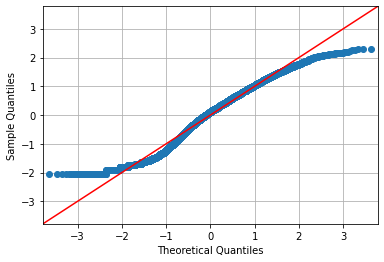

In [649]:
fig = sm.qqplot(df_weather1_boxcox_transformed, line='45', fit=True)
plt.grid()

- **Observations** 
 - Post transform **weather == 1** category **doesn't follow Gaussian** distribution
 - Need to **check normality using** other statistical methods such as **Kolmogorov Smirnov test (kstest)** or **Anderson-Darling Normality Test (AD)** 

 - **Weather 2** - **Before and After Boxcox** transformation

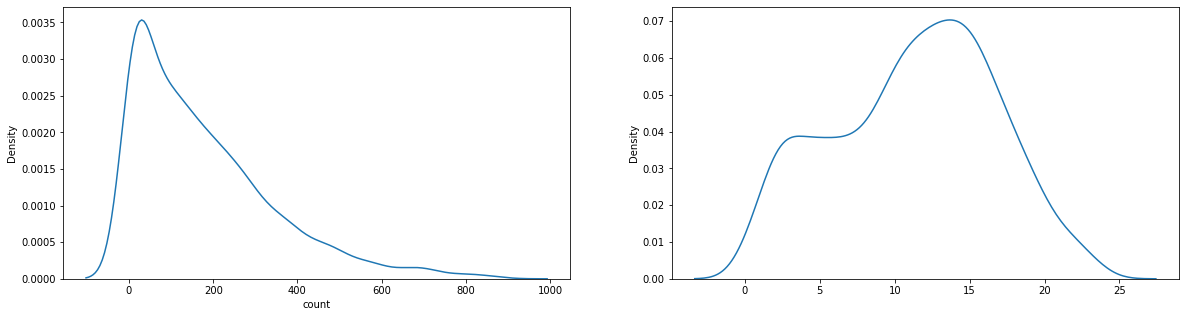

<Figure size 1080x360 with 0 Axes>

In [650]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_weather2_selected["count"], hist=False,ax = ax[0])
sns.distplot(df_weather2_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

##### QQplot weather = 2

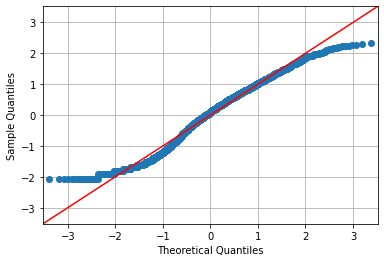

In [651]:
fig = sm.qqplot(df_weather2_boxcox_transformed, line='45', fit=True)
plt.grid()

- **Observations** 
  - Post transform **weather == 2** category **doesn't follow** Gaussian distribution
  - Need to **check normality using** other statistical methods such as **Kolmogorov Smirnov test (kstest)** or **Anderson-Darling Normality Test (AD)**

 - **Weather 3** - **Before and After Boxcox** transformation

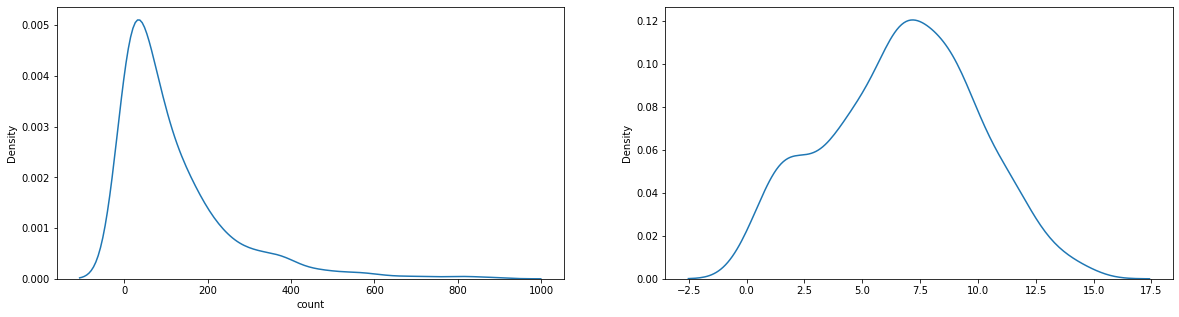

<Figure size 1080x360 with 0 Axes>

In [652]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_weather3_selected["count"], hist=False,ax = ax[0])
sns.distplot(df_weather3_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

##### QQplot weather = 3

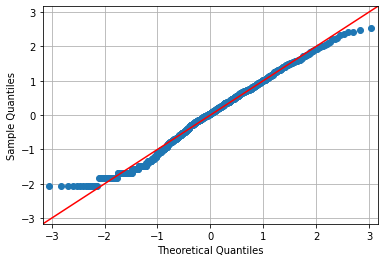

In [653]:
fig = sm.qqplot(df_weather3_boxcox_transformed, line='45', fit=True)
plt.grid()

- **Observations** 
 - Post transform **weather == 3** category **doesn't follow Gaussian** distribution
 - Need to **check normality using** other statistical methods such as **Kolmogorov Smirnov test (kstest)** or **Anderson-Darling Normality Test (AD)**

 - **Season 1** - **Before and After Boxcox** transformation

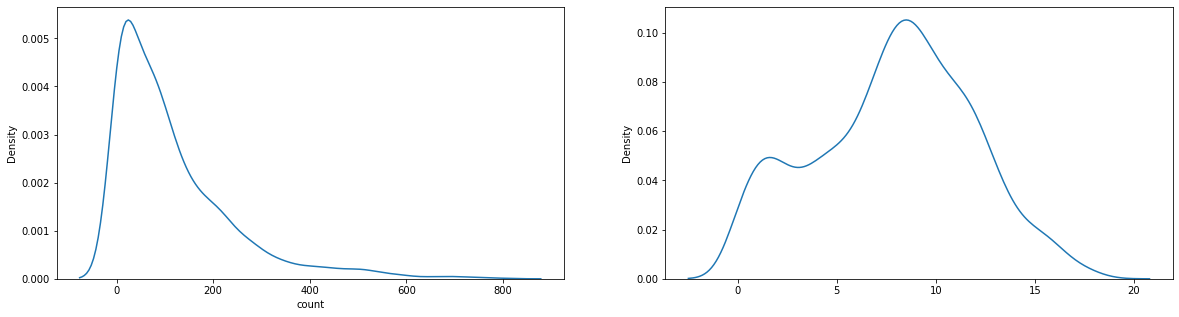

<Figure size 1080x360 with 0 Axes>

In [654]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_season1_selected["count"], hist=False,ax = ax[0])
sns.distplot(df_season1_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

##### QQplot season = 1

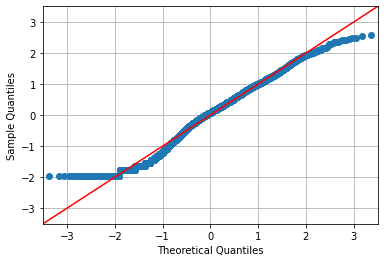

In [655]:
fig = sm.qqplot(df_season1_boxcox_transformed, line='45', fit=True)
plt.grid()

- **Observations** 
 - Post transform **season == 1** category **doesn't follow Gaussian** distribution
 - Need to **check normality using** other statistical methods such as **Kolmogorov Smirnov test (kstest)** or **Anderson-Darling Normality Test (AD)**

- **Season 2 - Before and After Boxcox** transformation

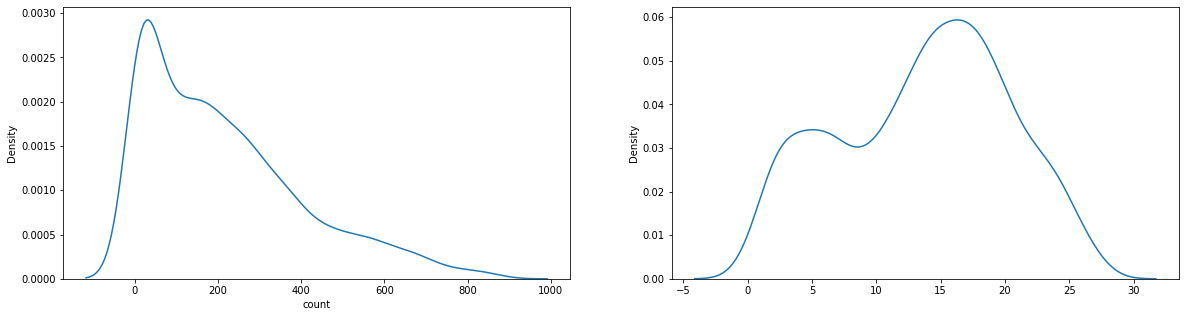

<Figure size 1080x360 with 0 Axes>

In [656]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_season2_selected["count"], hist=False,ax = ax[0])
sns.distplot(df_season2_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

##### QQplot season = 2

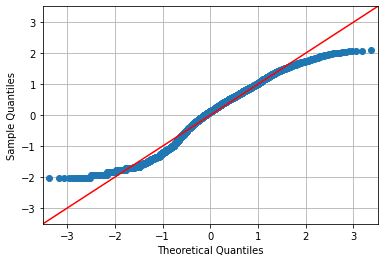

In [657]:
fig = sm.qqplot(df_season2_boxcox_transformed, line='45', fit=True)
plt.grid()

- **Observations** 
 - Post transform **season == 2** category **doesn't follow** Gaussian distribution
 - Need to **check normality using** other statistical methods such as **Kolmogorov Smirnov test (kstest)** or **Anderson-Darling Normality Test (AD)**

- **Season 3 - Before and After Boxcox** transformation

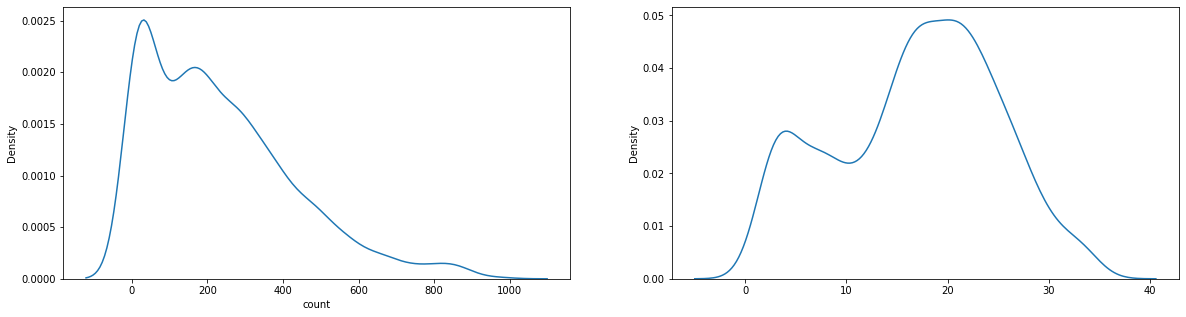

<Figure size 1080x360 with 0 Axes>

In [658]:
fig, ax = plt.subplots(1, 2)
plt.figure(figsize=(15,5))
sns.distplot(df_season3_selected["count"], hist=False,ax = ax[0])
sns.distplot(df_season3_boxcox_transformed, hist=False,ax = ax[1])
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(20)

##### QQplot season = 3

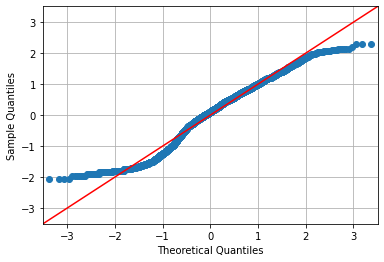

In [659]:
fig = sm.qqplot(df_season3_boxcox_transformed, line='45', fit=True)
plt.grid()

- **Observations** 
 - Post transform **season == 3** category **approximately follow** Gaussian distribution
 - Need to **check normality using** other statistical methods such as **Kolmogorov Smirnov test (kstest)** or **Anderson-Darling Normality Test (AD)**

### (STEP 1.3) Test Normality using other statistical method (As QQPlot doesn't show not conclisive evidence of Normality) 

-  **Kolmogorov Smirnov test (kstest)** - To check Normality of the distribution 

In [660]:
stats.kstest(df_weather1_boxcox_transformed, 'norm')

KstestResult(statistic=0.9385930973247315, pvalue=0.0)

In [661]:
stats.kstest(df_weather2_boxcox_transformed, 'norm')

KstestResult(statistic=0.9359574835229192, pvalue=0.0)

In [662]:
stats.kstest(df_weather3_boxcox_transformed, 'norm')

KstestResult(statistic=0.8858224081312904, pvalue=0.0)

In [663]:
stats.kstest(df_season1_boxcox_transformed, 'norm')

KstestResult(statistic=0.8728628209447495, pvalue=0.0)

In [664]:
stats.kstest(df_season2_boxcox_transformed, 'norm')

KstestResult(statistic=0.9469166155588353, pvalue=0.0)

In [665]:
stats.kstest(df_season3_boxcox_transformed, 'norm')

KstestResult(statistic=0.9678883811012187, pvalue=0.0)

-  **Anderson-Darling Normality Test (AD)** - To check Normality of the distribution 

In [666]:
stats.anderson(df_weather1_boxcox_transformed, 'norm')

AndersonResult(statistic=43.31858675187959, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [667]:
stats.anderson(df_weather2_boxcox_transformed, 'norm')

AndersonResult(statistic=14.843634614999246, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [668]:
stats.anderson(df_weather3_boxcox_transformed, 'norm')

AndersonResult(statistic=2.1879393636947952, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [669]:
stats.anderson(df_season1_boxcox_transformed, 'norm')

AndersonResult(statistic=11.083539750920863, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [670]:
stats.anderson(df_season2_boxcox_transformed, 'norm')

AndersonResult(statistic=19.764933058189854, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [671]:
stats.anderson(df_season1_boxcox_transformed, 'norm')

AndersonResult(statistic=11.083539750920863, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

- **Interpretation of Anderson test**
 - If the returned statistic is larger than these critical values then for the corresponding significance level, 
 - the null hypothesis that the data come from the Normal distribution can be rejected. 

- **(STEP 1) Conclusion** :
 - **Transformation did help** to convert count distribution **to follow Gaussian distribution** for each groups
 - **None of the Groups (both weather and season) followed Gaussian**
   - **QQplot failed to prove the normality** - as there is deviation from fitted line at the ends
   - **KS Test failed to prove normality**  - as p-value of each group is equal to 0 i.e. less than alpha (0.05)
   - **AD test failed to prove normality** - Returned statistic is larger than critical values for the corosponding significance level hence the **null hypothesis that the data come from the Normal distribution can be rejected** 
 - **Assumption # 1 for ANOVA didn't satisfy** hence can't use ANOVA

### (STEP 2) Verify ANOVA Assumption # 2 - Group's variance is roughly the same or not

- **Weather**

<AxesSubplot:xlabel='count', ylabel='Count'>

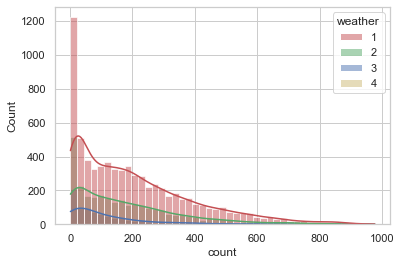

In [834]:
sns.histplot(data=df, x="count", hue="weather",kde=True,palette=['r', 'g', 'b', 'y'])

- **Obervations**: 
 - All group's **variance's are more or less close to each other** 
 - Need statisctical tools to confirm that
 - Need to use **Levene's test to confirm if variances are same or not** 

- Hypothesis for **Variance test (weather)**
 - H0 : variance of weather 1 ==  variance of weather 2 == variance of weather 3 come i.e. all groups comes from populations with equal variances.
 - Ha : **variances are not equal**

In [673]:
test_stat, p_values = stats.levene(df_weather_1["count"], df_weather_2["count"], df_weather_3["count"])

In [674]:
test_stat, p_values

(81.67574924435011, 6.198278710731511e-36)

- **Obervations**
 - The small p-value suggests that **diff weather groups do not have equal variances**

- **Season**

<AxesSubplot:xlabel='count', ylabel='Count'>

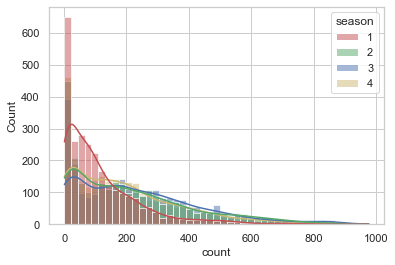

In [833]:
sns.histplot(data=df, x="count", hue="season",kde=True,palette=['r', 'g', 'b', 'y'])

- Hypothesis for **Variance test (season)**
 - H0 : variance of season 1 ==  variance of season 2 == variance of season 3 come i.e. all groups comes from populations with equal variances.
 - Ha : **variances are not equal**

In [676]:
test_stat, p_values = stats.levene(df_season_1["count"], df_season_2["count"], df_season_3["count"])

In [677]:
test_stat, p_values

(280.90498528117473, 1.0617529673100525e-118)

In [678]:
test_stat, p_values = stats.levene(df_season_1["count"], df_weather_1["count"])
test_stat, p_values

(467.07468504263414, 3.0040040199868985e-101)

In [679]:
test_stat, p_values = stats.levene(df_season_2["count"], df_weather_2["count"])
test_stat, p_values

(48.66496678110432, 3.389797672560528e-12)

In [680]:
test_stat, p_values = stats.levene(df_season_3["count"], df_weather_3["count"])
test_stat, p_values

(167.43371357451045, 1.8278218136253984e-37)

In [681]:
test_stat, p_values = stats.levene(df_season_1["count"], df_weather_2["count"])
test_stat, p_values

(197.40908873604647, 4.383674917936017e-44)

In [682]:
test_stat, p_values = stats.levene(df_season_2["count"], df_weather_1["count"])
test_stat, p_values

(3.7333533481450663, 0.053364644150380704)

In [683]:
test_stat, p_values = stats.levene(df_season_3["count"], df_weather_1["count"])
test_stat, p_values

(10.934357767704045, 0.0009473257552531858)

In [684]:
test_stat, p_values = stats.levene(df_season_1["count"], df_weather_3["count"])
test_stat, p_values

(1.4163330150470075, 0.2340876525014832)

In [685]:
test_stat, p_values = stats.levene(df_season_3["count"], df_weather_2["count"])
test_stat, p_values

(65.93847989351673, 5.680177176183706e-16)

In [686]:
test_stat, p_values = stats.levene(df_season_2["count"], df_weather_3["count"])
test_stat, p_values

(150.6023240857037, 6.075104594620952e-34)

- **Obervations**
 - The small p-value suggests that **diff seasons groups do not have equal variances**
 - There is no equal variance even for following group combinations as levene test's p-values are more than 0.05 
   - season = 1 , weather = 1
   - season = 2 , weather = 2
   - season = 3 , weather = 3
   - season = 1 , weather = 3
   - season = 3 , weather = 1
   - season = 1 , weather = 2
   - season = 2 , weather = 1

 - There is **equal variance**  for following group combinations as levene test's p-values are more than 0.05 
   - season = 3 , weather = 2
   - season = 2 , weather = 3

- **(STEP 2) Conclusion** :
 - **Assumption # 2 for ANOVA didn't satisfy** hence can't use ANOVA

### (STEP 3) Verify ANOVA Assumption # 3 - Observations are independent or not

#### Chi-square Test - Non-prametric test doesn't have any assumptions 

- **Chi-square Test** to check if **Weather is dependent on the season**
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : Weather is in-dependent of the season
      - **Alternate hypothesis (Ha)** : There is a dependency between Weather and season

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **Chi-square Test** . 
  - **Decide One sided / two-sided tail test**
      - Right tail test always as it's going to be positive 
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**

In [687]:
crosstab = pd.crosstab(df['season'], df['weather'])
crosstab

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [688]:
chi2_tstats, p_value, dof, expected_frequencies = stats.chi2_contingency(crosstab)

In [689]:
chi2_tstats, p_value, dof, expected_frequencies

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

- **(STEP 3) Conclusion(Chi-square Test)** : 
    - p-value is much less than 0.05, hence we failed to accept H0 
    - **Overall weather and season are dependent**
    - **Assumption # 3 for ANOVA didn't satisfy** hence can't use ANOVA
    - Mean based satistical methods are not being useful because of large number of outliers present in each groups
    - Hence median based statistical tools would come into play 

### (STEP 4) Use The Kruskal–Wallis test , a nonparametric alternative approach as we can't use one-way ANOVA

- **Kruskal–Wallis test** to check if **population median** of all of the **groups are equal**
  - **Define H0 and Ha**
      - **Null hypothesis (H0)** : **Population median** of **all** of the **weather groups are equal**
      - **Alternate hypothesis (Ha)** : Population median of all of the weathers are **not equal**

  - **Define experiment and "sensible" (i.e. distribution of test under H0) test statistics**
      - **The Kruskal–Wallis test** . 
  - **Decide One sided / two-sided tail test**
      - Right tail test always as it's going to be positive 
  - **Define alfa (significance level)**
      - Let's assume significance level(alpha value) as 5%
  - **Calculate p-value**
  - **Assumptions**
      - It's **non-parametric test**, hence **no assumptions** 
      - The test works on 2 or more independent samples, which may have different sizes.

In [694]:
stats.kruskal(df_weather_1["count"], df_weather_2["count"],df_weather_3["count"],nan_policy='propagate', axis=0)

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

In [695]:
stats.kruskal(df_season_1["count"], df_season_2["count"],df_season_3["count"],df_season_4["count"],nan_policy='propagate', axis=0)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

- **(STEP 4) Conclusion(Kruskal–Wallis test)** : 
    - p-value is much less than 0.05, hence we failed to accept H0 
    - **weather and season groups medians are not equal**
    - Hence **both weather and season have contribution to number of  No. of cycles rented**